In [ ]:
# Paso 1: Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.impute import SimpleImputer

# Paso 2: Cargar el dataset
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

# Paso 3: Selección de columnas relevantes
features = ['Age', 'Rating', 'Positive Feedback Count', 'Division Name', 'Department Name', 'Class Name']
target = 'Recommended IND'
df = df[features + [target]].dropna()

X = df[features]
y = df[target]

# Paso 4: Definir columnas numéricas y categóricas
numerical = ['Age', 'Rating', 'Positive Feedback Count']
categorical = ['Division Name', 'Department Name', 'Class Name']

# Paso 5: Preprocesadores
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical),
    ('cat', categorical_transformer, categorical)
])

# Paso 6: Crear pipelines de modelos
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Paso 7: Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 8: Entrenar y evaluar
rf_pipeline.fit(X_train, y_train)
dt_pipeline.fit(X_train, y_train)

rf_pred = rf_pipeline.predict(X_test)
rf_proba = rf_pipeline.predict_proba(X_test)[:, 1]
dt_pred = dt_pipeline.predict(X_test)
dt_proba = dt_pipeline.predict_proba(X_test)[:, 1]

# Paso 9: Métricas
rf_report = classification_report(y_test, rf_pred, output_dict=True)
rf_auc = roc_auc_score(y_test, rf_proba)
dt_report = classification_report(y_test, dt_pred, output_dict=True)
dt_auc = roc_auc_score(y_test, dt_proba)

# Paso 10: Validación cruzada (5 folds)
rf_cv = cross_val_score(rf_pipeline, X, y, cv=5, scoring='roc_auc').mean()
dt_cv = cross_val_score(dt_pipeline, X, y, cv=5, scoring='roc_auc').mean()

# Paso 11: Mostrar resultados
print("=== Random Forest ===")
print("Accuracy:", rf_report['accuracy'])
print("F1-score (clase 1):", rf_report['1']['f1-score'])
print("ROC AUC (test):", rf_auc)
print("ROC AUC (CV 5 folds):", rf_cv)

print("\n=== Decision Tree ===")
print("Accuracy:", dt_report['accuracy'])
print("F1-score (clase 1):", dt_report['1']['f1-score'])
print("ROC AUC (test):", dt_auc)
print("ROC AUC (CV 5 folds):", dt_cv)


=== Random Forest ===
Accuracy: 0.921618743343983
F1-score (clase 1): 0.9519079979090433
ROC AUC (test): 0.9584020760709958
ROC AUC (CV 5 folds): 0.9581451731419927

=== Decision Tree ===
Accuracy: 0.9137380191693291
F1-score (clase 1): 0.946843417771361
ROC AUC (test): 0.8804310290606396
ROC AUC (CV 5 folds): 0.8837422403115639


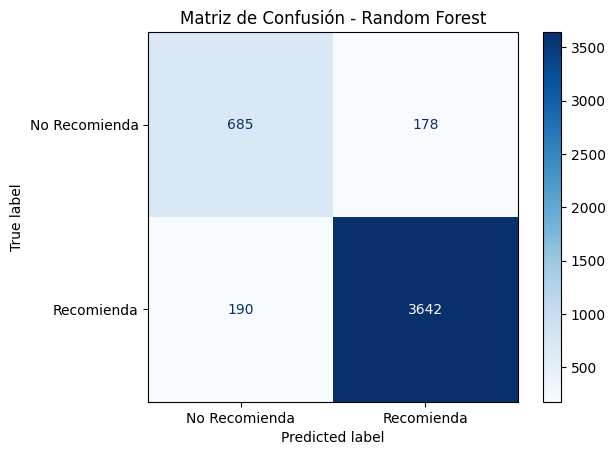

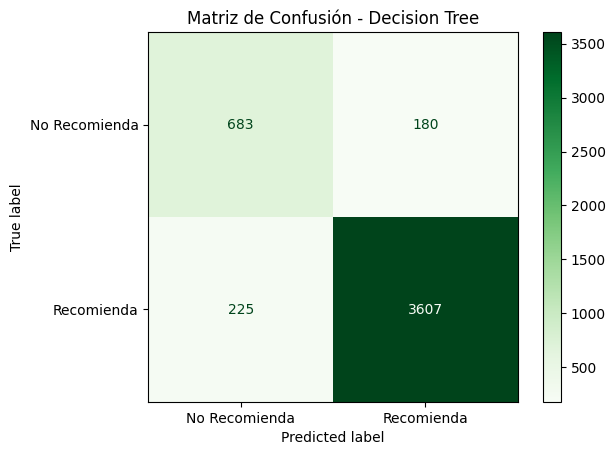

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Paso 12: Matriz de Confusión - Random Forest
rf_cm = confusion_matrix(y_test, rf_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=['No Recomienda', 'Recomienda'])
disp_rf.plot(cmap='Blues')
plt.title("Matriz de Confusión - Random Forest")
plt.grid(False)
plt.show()

# Paso 13: Matriz de Confusión - Decision Tree
dt_cm = confusion_matrix(y_test, dt_pred)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=['No Recomienda', 'Recomienda'])
disp_dt.plot(cmap='Greens')
plt.title("Matriz de Confusión - Decision Tree")
plt.grid(False)
plt.show()


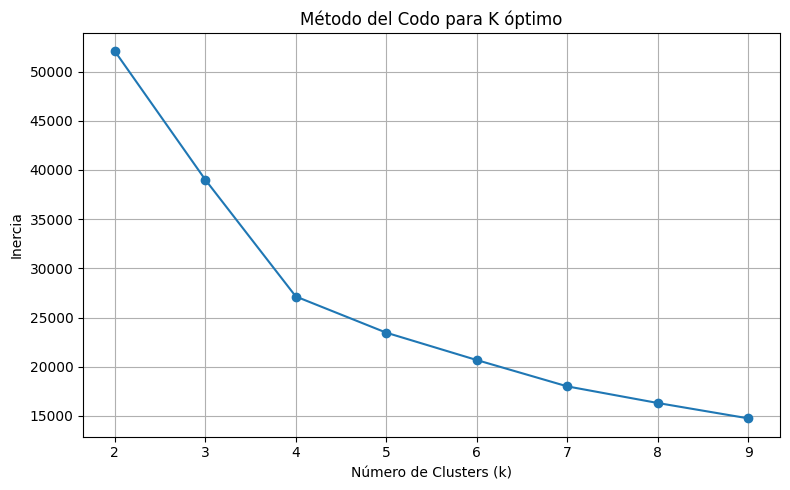

=== K-Means ===
Silhouette Score: 0.368
Dunn Index: 0.0037
Clusters: 3

=== DBSCAN ===
Silhouette Score: 0.1917
Dunn Index: 0.0557
Clusters (sin ruido): 6
Puntos de ruido: 119


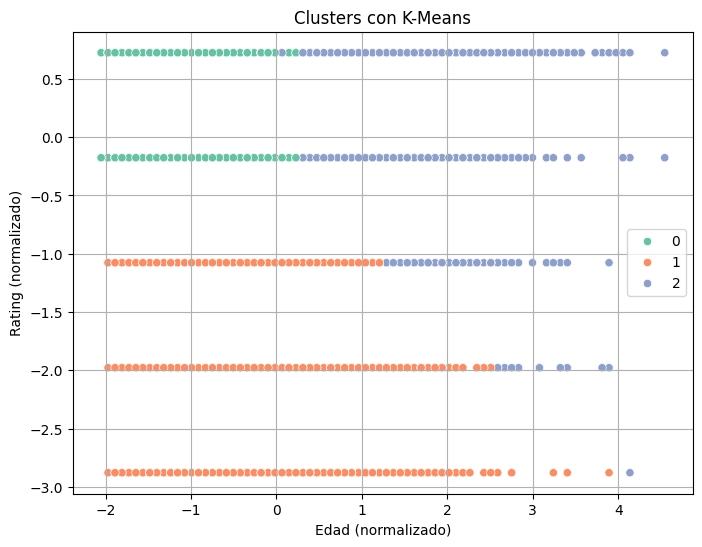

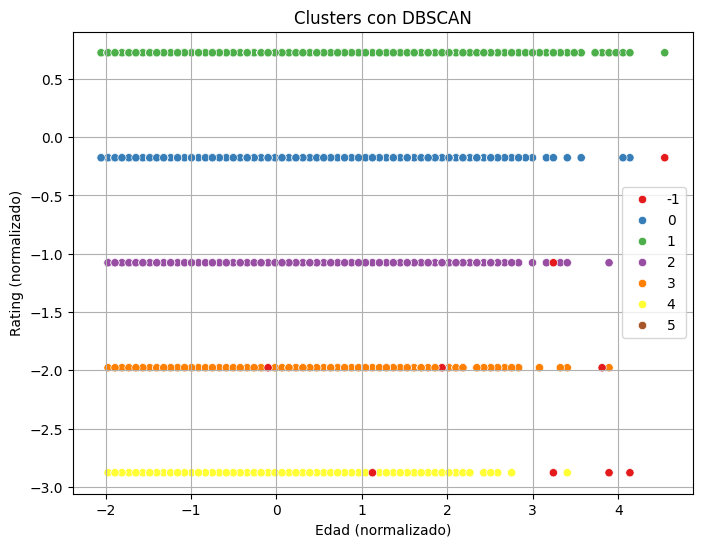

In [ ]:
# Paso 1: Importar librerías necesarias
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 2: Cargar el dataset
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

# Paso 3: Seleccionar características relevantes
features = ['Age', 'Rating', 'Positive Feedback Count']
data = df[features].dropna()

# Paso 4: Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# Paso 5: Método del codo para determinar k óptimo
inertia = []
K_range = range(2, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

# Paso 6: Graficar método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Método del Codo para K óptimo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.tight_layout()
plt.show()

# Paso 7: Elegir k óptimo (ajústalo según la gráfica, aquí asumimos k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Paso 8: Aplicar DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Paso 9: Métrica de Silhouette
kmeans_sil = silhouette_score(X_scaled, kmeans_labels)
dbscan_sil = silhouette_score(X_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else None

# Paso 10: Índice de Dunn
def dunn_index(X, labels):
    distances = squareform(pdist(X))
    unique_clusters = np.unique(labels)
    unique_clusters = unique_clusters[unique_clusters != -1]
    if len(unique_clusters) < 2:
        return None
    inter_dists = [np.min(distances[np.ix_(labels == i, labels == j)])
                   for i in unique_clusters for j in unique_clusters if i < j]
    intra_diams = [np.max(distances[np.ix_(labels == c, labels == c)]) for c in unique_clusters]
    return np.min(inter_dists) / np.max(intra_diams)

kmeans_dunn = dunn_index(X_scaled, kmeans_labels)
dbscan_dunn = dunn_index(X_scaled, dbscan_labels)

# Paso 11: Imprimir resultados
print("=== K-Means ===")
print("Silhouette Score:", round(kmeans_sil, 4))
print("Dunn Index:", round(kmeans_dunn, 4))
print("Clusters:", len(set(kmeans_labels)))

print("\n=== DBSCAN ===")
print("Silhouette Score:", round(dbscan_sil, 4) if dbscan_sil else "N/A")
print("Dunn Index:", round(dbscan_dunn, 4) if dbscan_dunn else "N/A")
print("Clusters (sin ruido):", len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0))
print("Puntos de ruido:", sum(dbscan_labels == -1))

# Paso 12: Visualización de clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans_labels, palette='Set2')
plt.title("Clusters con K-Means")
plt.xlabel("Edad (normalizado)")
plt.ylabel("Rating (normalizado)")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dbscan_labels, palette='Set1')
plt.title("Clusters con DBSCAN")
plt.xlabel("Edad (normalizado)")
plt.ylabel("Rating (normalizado)")
plt.grid(True)
plt.show()


https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews